# Linearity and Shift-invariance

$$
\require{cancel}\notag%
\require{color}\notag%
\require{amsmath}\notag%%
$$

In [1]:
%run ../setup.ipynb

We'll end this chapter with a discussion of two of the more advanced properties of convolutional filters: linearity and shift-invariance.
These are general concepts which can be applied to more than just convolutional filters, but for now, we'll focus on the specific case of convolution.

Taken together, these two conditions (linearity and shift-invariance) are often referred to as *LSI*, and a system satisfying these properties is called an *LSI system*.

## Shift-invariance



The idea of shift-invariance is that delay can be applied either before or after a system $g$, and produce the same result.

Formally, let $\Delta$ denote a $d$-step delay filter for some fixed but arbitrary delay $d \in \mathbb{N}$:

$$
\Delta = [\underbrace{0, 0, \dots, 0}_{d \text{ times}}, 1]
$$

so that convolving a signal $x$ with $\Delta$ yields

```{math}
:label: conv-delay2

(\Delta * x)[n] = x[n-d].
```

````{admonition} Definition: shift-invariance
:class: important

A filter $g$ is **shift-invariant** if for all delays $d$ (implemented by delay filter $\Delta$) and all input signals $x$, the following is true:

```{math}
:label: shift-invariance

g(\Delta * x) = \Delta * g(x).
```
````

In plain language, equation {numref}`shift-invariance` says that if we delay $x$ by $d$ samples, and then process the delayed signal by the system $g$, we will get the exact same result as if we had first applied $g$ to $x$ (without delay) and then delayed the result.

```{margin} Shift-invariance or time-invariance?
The term *time-invariant* is also commonly used to describe the property above.
There are two reasons why shift-invariance is a more precise term:

1. "Time-invariant" does not describe what transformation of time the system is invariant to.  Shifting is one transformation, but so is stretching (e.g., changing units from seconds to milliseconds), reversal, or any number of other actions.

2. "Shift-invariant" can be applied to systems operating on other kinds of signals, such as images, which may have different notions of "position" than time (e.g., pixel coordinates).

For these reasons, we'll stick to the more precise terminology, but you are likely to encounter the *time-invariant* terminology elsewhere, so remember that these are the same thing.
```

### All convolutional systems are shift-invariant

Let $g(x) = h *x$ be a convolutional system for some fixed $h$ and any input signal $x$, and let $\Delta$ be the impulse response of a $d$-step delay for any fixed $d \geq 0$.
To prove that $g$ is shift-invariant, we need to verify that

$$
g(\Delta * x) = \Delta * g(x).
$$

We'll do this by the following argument:

$$
\begin{align*}
g(\Delta * x) &= h * (\Delta * x) & \text{ apply }g\text{ to delayed input}\\
&= (h * \Delta) * x & \text { associative rule}\\
&= (\Delta * h) * x & \text { commutative rule}\\
&= \Delta * (h * x) & \text { associative rule}\\
&= \Delta * g(x) & \text { definition of }g.
\end{align*}
$$

This can give us a shortcut to showing shift-invariance: if you can implement a system $g$ in terms of convolution, it automatically satisfies shift-invariance!

## Linearity

*Linearity* is another important characteristic of many systems, including convolution.
Broadly speaking, it encapsulates our notions of *gain* and *mixing* of signals.

(linearity)=
````{admonition} Definition: linearity

A system $g$ is **linear** if for any two signals $x_1$ and $x_2$, and for any pair of numbers $c_1$ and $c_2$, the following holds:

```{math}
:label: linearity
g(c_1 \cdot x_1 + c_2 \cdot x_2) = c_1 \cdot g(x_1) + c_2 \cdot g(x_2).
```
````

This might look like a tangle of symbols, so it helps to think about a few special cases.
For instance, if we take $x_2$ to be a silent (all zeros) signal, and $c_2 = 0$, then we get the simpler case

$$
g(c_1 \cdot x_1) = c_1 \cdot g(x_1),
$$
which is also known as *homogeneity*.  This says that gain can be applied before or after the system $g$ with no difference in the output.

Similarly, if we take $c_1 = c_2 = 1$, then we get

$$
g(x_1 + x_2) = g(x_1) + g(x_2),
$$

which is also known as *additivity*.  This says that signals can be mixed before applying $g$, or after, and the result will be the same.  We've already seen this particular case before, when discussing how convolution {ref}`distributes over addition <convolution-distributive>`.

The linearity definition {eq}`linearity` combines these two ideas into one compact form.

```{margin} Aside: why *linear*?

In the context of signal processing, the term *linearity* might seem a little out of place, if not downright mysterious.

Like many parts of our mathematical vocabulary, the term is borrowed from the theory of [*linear algebra*](https://en.wikipedia.org/wiki/Linear_algebra), where operators like rotation or translation are defined to ensure that the shapes of straight lines are preserved after application.

The idea is much more general though, and in our context, *linearity* should be interpreted as preserving *gain* and *mixture* of signals.
```

### All convolutional systems are linear

As before, let $g(x) = h*x$ be an arbitrary convolutional system, and let $x_1$ and $x_2$ denote arbitrary signals, and $c_1, c_2$ denote arbitrary numbers.

We could prove that $g$ is linear by brute force, using the definition of convolution and working through the algebra directly.  (If this sounds like fun, please feel free to give it a shot!)

We'll take a slightly different route here though, relying on facts we already know about convolution.

Recall that we can implement gain as a convolutional system by creating an impulse response with only one element: {ref}`convolution-gain`.
Let $C_1 = [c_1]$ and $C_2 = [c_2]$, so that

$$
\begin{align*}
c_1 \cdot x_1[n] &= (C_1 * x_1)[n]\\
c_2 \cdot x_2[n] &= (C_2 * x_2)[n].
\end{align*}
$$

Then, we can show linearity in terms of associative, commutative, and distributive properties:

$$
\begin{align*}
g(c_1 \cdot x_1 + c_2 \cdot x_2) &= h * (c_1 \cdot x_1 + c_2 \cdot x_2) & \text{ apply }g\\
&= h * (C_1 * x_1 + C_2 * x_2) & \text { use definition of } C_1, C_2\\
&= (h * C_1 * x_1) + (h * C_2 * x_2) & \text { distributive rule}\\
&= (C_1 * h * x_1) + (C_2 * h * x_2) & \text { commutative rule (twice)}\\
&= C_1 * (h * x_1) + C_2 * (h * x_2) & \text { associative rule (twice)}\\
&= C_1 * g(x_1) + C_2 * g(x_2) & \text { definition of }g\\
&= c_1 \cdot g(x_1) + c_2 \cdot g(x_2) & \text { definition of }C_1, C_2\\
\end{align*}
$$

Note that the use of convolution to implement gain here is mainly for convenience: having all operations expressed as either sums or convolutions buys us a bit of notational simplicity.
That said, it is still completely valid to prove this from first princples, but the derivation would be longer.

## Systems which are not LSI

Not all filtering operations you might want to do satisfy the LSI conditions.
Some might be only linear, some might be only shift-invariant, and some might be neither.
Identifying these properties can be helpful for understanding both how a particular system behaves, and how it can be combined with others.
In particular, since all convolutional systems are LSI, we can infer that any system which is *not* LSI cannot be implemented by a convolution!

### Shift-invariant, but not linear

There are many systems which are shift-invariant, but not linear.
Generally speaking, any system which operates on each sample *value* independently (like *gain*) will be shift-invariant.
Linearity will then depend on *how* the sample values are processed.

#### Clipping

A **clipping** system limits the output of a system so that it cannot be less than some minimum value $v_-$ or greater than a maximum value $v_+$.
In equations, this looks like:

$$
y[n] = \begin{cases}
v_+ & x[n] \geq v_+\\
v_- & x[n] \leq v_-\\
x[n] & \text{otherwise}
\end{cases}.
$$

Equivalently, in code this is expressed as:
```python
def clip(x, vmin, vmax):
    # This behavior is implemented by np.clip,
    # but we provide a full implementation
    # here for reference.
    
    N = len(x)
    y = np.zeros(N)
    
    for n in range(N):
        if x[n] >= vmax:
            y[n] = vmax
        elif x[n] <= vmin:
            y[n] = vmin
        else:
            y[n] = x[n]
    return y
```

```{margin} Clipping
Clipping is a key step of many *distortion* effects, leading to the distinctive sound of distorted electric guitar.
This is because clipping models what happens to amplifier circuits when pushed past their limits (overdriven): the amplifier is asked to produce a voltage higher than it's capable of, and the output signal saturates at its voltage limits.
```

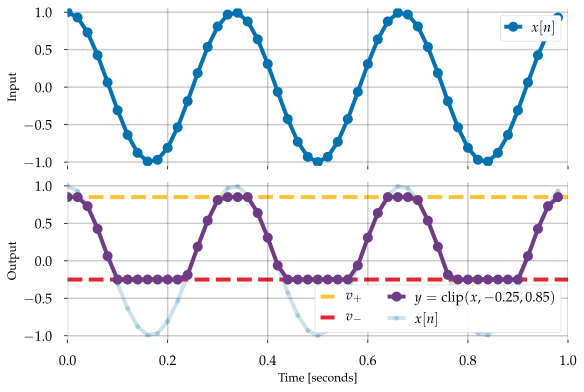

In [2]:
fs = 50
f0 = 3
duration = 1
times = np.arange(duration * fs) / fs
x = np.cos(2 * np.pi * f0 * times)
y = np.clip(x, -0.25, 0.85)

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=figaspect(2./3))
ax.plot(times, x, label='$x[n]$', marker='o', markersize=10)
ax.label_outer()
ax.legend(loc='upper right')
ax.set_ylabel('Input')
#ax.set_title('Example: clipping')

ax2.axhline(0.85, color=colors[2], linestyle='--', zorder=-1, label=r'$v_+$')
ax2.axhline(-0.25, color=colors[1], linestyle='--', zorder=-1, label=r'$v_-$')
ax2.plot(times, y, label=r'$y = \mathrm{clip}(x, -0.25, 0.85)$', 
           color=colors[4], marker='o', markersize=10)
ax2.plot(times, x, label='$x[n]$', marker='o', markersize=5, alpha=0.2, zorder=-1)
ax2.label_outer()
ax2.set_xlim([0, 1])
ax2.set_ylim([-1.05, 1.05])
ax2.set_xlabel('Time [seconds]')
ax2.legend(loc='lower right', ncol=2)
ax2.set_ylabel('Output');
glue('clipping', fig, display=False)

```{glue:figure} clipping

Top: an input signal $x$.

Bottom: the result of clipping $x$ to lie between $v_-$ and $v_+$ (dashed lines).
```

Remember that if a system is linear, it must be linear for *all* signals $x_1,x_2$ and scalars $c_1,c_2$. 
To show that clipping is not linear, we only need to find one counter-example case: a setting of $x_1, x_2, c_1, c_2$ for which it fails to hold.

Imagine taking a signal $x_1[n] = v_+$ (for all $n$), letting $x_2 = 0$, and setting $c_1=2$.
Then 

$$
g(c_1 \cdot x_1) = g(2 \cdot v_+) = v_+
$$

but this is not equal to $c_1 \cdot g(x_1) = 2 \cdot v_+$.

In general, showing that a system is not linear requires some insight about how the system operates.  In this case, we exploited the fact that the behavior of $g$ changes when the input is above $v_+$, and used that to construct a counter-example.
This type of argument often seems obvious in hindsight, but creating counter-examples is a skill that takes practice to develop.

### Linear, but not shift-invariant

Just as in the previous case, there are many systems which are linear, but not shift-invariant.
In this case, the dependence to look at is on the sample indices.


#### Time-reversal

A *time-reversal* system does exactly what it sounds like: it plays the signal backward.
Mathematically, this is done by swapping the sample at index $n$ with the one at index $N-1-n$:

$$
y[n] = x[N - 1 - n]
$$

or in code,
```python
def reverse(x):
    # This could be equivalently done with the one-liner:
    #   return x[::-1]
    
    N = len(x)
    y = np.zeros(N)
    
    for n in range(N):
        y[n] = x[N-1-n]
    return y
```
Note that the previous example (clipping) can operate independently on each sample, and do not need to know the entire signal at once to operate correctly.
However, this system needs to know the entire signal in advance.

To show that time-reversal is not shift-invariant, we again must construct a counter-example.
Here the key property that we're looking at is symmetry (in time), so we should probably consider signals which do not look the same forwards as backwards.
Sinusoids and square waves probably won't work, but a sawtooth will do nicely!

After that, we need only check what happens when we delay the input by some number of samples.  Here, we'll take a 5-step delay, but any positive number would do.

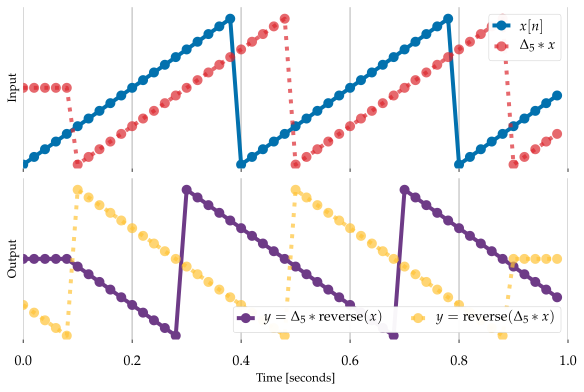

In [3]:
import scipy.signal

fs = 50
f0 = 2.5
duration = 1
times = np.arange(duration * fs) / fs
h = np.array([0,0,0,0,0,1])
x = scipy.signal.sawtooth(2 * np.pi * f0 * times)
x_delay = np.convolve(x, h)[:len(x)]
y = x[::-1]
y_delay = np.convolve(y, h)[:len(y)]
y_delay2 = x_delay[::-1]

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=figaspect(2./3))
ax.plot(times, x, label='$x[n]$', marker='o', markersize=10)
ax.plot(times, x_delay, label='$\Delta_5*x$', linestyle=':',
          marker='o', markersize=10, alpha=0.7)
ax.label_outer()
ax.legend(loc='upper right')
ax.set_ylabel('Input')
#ax.set_title('Example: time-reversal')

ax2.plot(times, y_delay, label=r'$y = \Delta_5*\mathrm{reverse}(x)$', 
           color=colors[4], marker='o', markersize=10)
ax2.plot(times, y_delay2, label=r'$y = \mathrm{reverse}(\Delta_5*x)$', 
           color=colors[2], linestyle=':', marker='o', markersize=10, alpha=0.7)
ax2.label_outer()
ax2.set_xlim([0, 1])
ax2.set_ylim([-1.05, 1.05])
ax2.set(yticks=[])
ax2.set_xlabel('Time [seconds]')
ax2.legend(loc='lower right', ncol=2)
ax2.set_ylabel('Output');
glue('time-reversal', fig, display=False)

```{glue:figure} time-reversal
---
name: reverse
---
Top: a signal $x[n]$ and a 5-sample delayed copy.
Bottom: applying time-reversal before or after delaying the input produces different output signals.
```

{numref}`reverse` shows that changing the order of operations (delay first or reverse first) matters, since the two signals in the bottom plot are not identical.
From this example, we can conclude that time-reversal is *not* shift-invariance.

## Summary

What we've seen here is that all convolutional systems are both linear and shift-invariant, and if a system fails to satisfy either of these conditions, then it cannot be implemented by convolution.

The connection here is even stronger than that: all LSI systems are convolutions as well!
Proving that this is true is beyond the scope of this text, and requires some slightly more sophisticated mathematics.
However, the equivalence between convolutions and LSI systems is one of the most powerful concepts in all of signal processing.